# Comparison of Interpolation Methods on Terrain Surfaces

In [1]:
import numpy as np
import pandas as pd
#from scipy.interpolate import interp2d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import sys
sys.path.append('../src')
import tile_model
import bilin_model
import ml_model
import model_utils
import subregion

Using TensorFlow backend.


### Import Data
***All data sourced from USGS DEMs***

In [2]:
# Define region of interest
NW_corner = (39.746620, -105.241833)
SE_corner = (39.744586, -105.237280)

# Generate data
ground_truth_data = subregion.SubRegion(NW_corner, SE_corner, data='1m')
tile_data = tile_model.TileModel(NW_corner, SE_corner, data='10m')
bilin_data = bilin_model.BilinModel(NW_corner, SE_corner, data='10m')
ml_data = ml_model.MLModel(NW_corner, SE_corner, data='10m')

retrieving raster data...
Geotransforming Elevation Data...
Unpacking Grid...
defining raster data parameters...
generating lat/lon domain arrays...
storing raster data...
generating elevation DataFrame...
building grid reference string...
generating file path to raster data...
retrieving raster data...
Geotransforming Elevation Data...
Unpacking Grid...
defining raster data parameters...
generating lat/lon domain arrays...
storing raster data...
generating elevation DataFrame...
building grid reference string...
generating file path to raster data...
retrieving raster data...
Geotransforming Elevation Data...
Unpacking Grid...
defining raster data parameters...
generating lat/lon domain arrays...
storing raster data...
generating elevation DataFrame...
building grid reference string...
generating file path to raster data...
retrieving raster data...
Geotransforming Elevation Data...
Unpacking Grid...
defining raster data parameters...
generating lat/lon domain arrays...
storing raster

## Ground Truth Surface with 1m Resolution Data
__Note: The Mines M can be seen on the surface__

Let's plot the ground-truth data

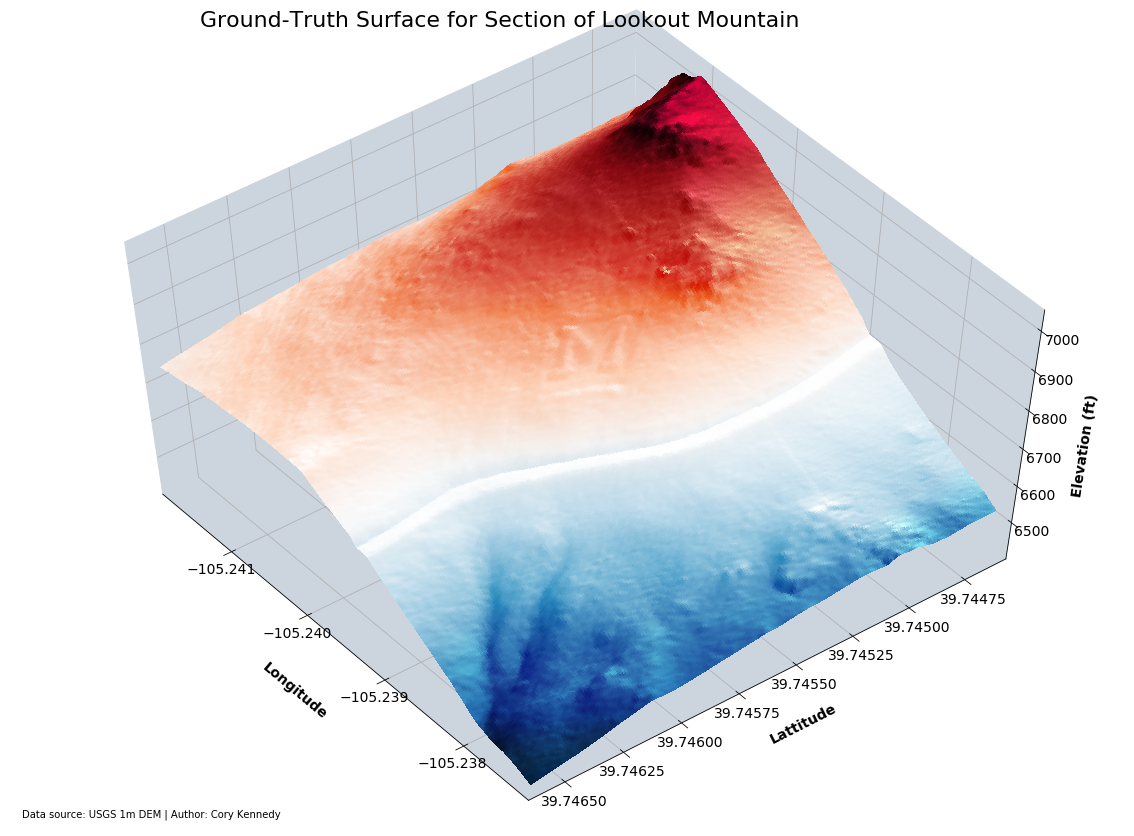

In [3]:
Z_ground_truth = ground_truth_data.elev.values

gt = ground_truth_data.elev

fig_height = 15
fig_width = 1.33 * fig_height

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca(projection='3d')

# Set background color
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))

# Remove the plot frame lines. They are unnecessary.       
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# Set view angle
ax.elev = 57
ax.azim = 322

# Set boundaries of plot to be filled by data
plt.ylim(gt.index.values[0], gt.index.values[-1])
plt.xlim(gt.columns.values.astype(float)[0], gt.columns.values.astype(float)[-1])
ax.set_zlim(np.amin(Z_ground_truth), np.amax(Z_ground_truth))

# Set tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
Z_labels = ['6500','6600','6700','6800','6900','7000']
ax.set_zticklabels(Z_labels, fontsize=14)
# Prevent displaying in exponential form
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set axis labels
ax.set_xlabel('Longitude', labelpad=30, fontsize=14, fontweight='bold')
ax.set_ylabel('Lattitude', labelpad=22, fontsize=14, fontweight='bold')
ax.set_zlabel('Elevation (ft)', labelpad=13, fontsize=14, fontweight='bold')

# Set plot title
title = "Ground-Truth Surface for Section of Lookout Mountain"
ax.text2D(0.17, 0.98, title, transform=ax.transAxes, fontsize=22)

# Add notes
ax.text2D(0.01, 0.01, "Data source: USGS 1m DEM | "
         "Author: Cory Kennedy", transform=ax.transAxes, fontsize=10)

# Plot surface needs 2D arrays as input
x = np.linspace(gt.columns.values.astype(float)[0], gt.columns.values.astype(float)[-1], gt.shape[1])
y = np.linspace(gt.index.values[0], gt.index.values[-1], gt.shape[0])
X, Y = np.meshgrid(x, y)
Z = Z_ground_truth

# Shade to highlight the features
ls = LightSource(180, 65)
shaded_RdBu_r = ls.shade(Z, cmap=cm.RdBu_r, vert_exag=1.1, blend_mode='overlay', fraction=1.1)

# Plot surface with points X,Y,Z
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=shaded_RdBu_r,
                       linewidth=0, antialiased=False, shade=False)

plt.savefig('../vis/ground_truth_surface.png', bbox_inches='tight');

## Baseline Surface with 10m Resolution Data (not interpolated)

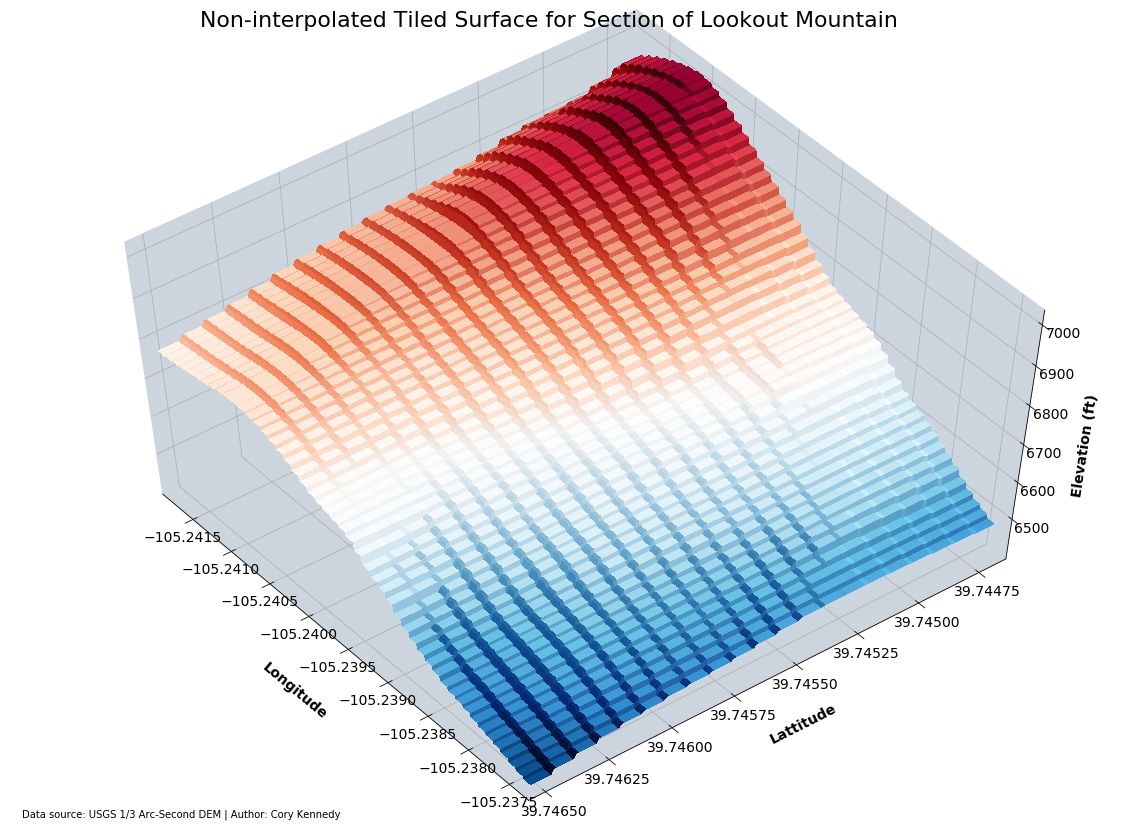

In [4]:
Z_tile = tile_data.elev.values

t = tile_data.elev

fig_height = 15
fig_width = 1.33 * fig_height

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca(projection='3d')

# Set background color
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))

# Remove the plot frame lines. They are unnecessary.       
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# Set view angle
ax.elev = 57
ax.azim = 322

# Set boundaries of plot to be filled by data
plt.ylim(t.index.values[0], t.index.values[-1])
plt.xlim(t.columns.values.astype(float)[0], t.columns.values.astype(float)[-1])
ax.set_zlim(np.amin(Z_tile), np.amax(Z_tile))

# Set tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
Z_labels = ['6500','6600','6700','6800','6900','7000']
ax.set_zticklabels(Z_labels, fontsize=14)
# Prevent displaying in exponential form
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set axis labels
ax.set_xlabel('Longitude', labelpad=30, fontsize=14, fontweight='bold')
ax.set_ylabel('Lattitude', labelpad=22, fontsize=14, fontweight='bold')
ax.set_zlabel('Elevation (ft)', labelpad=13, fontsize=14, fontweight='bold')

# Set plot title
title = "Non-interpolated Tiled Surface for Section of Lookout Mountain"
ax.text2D(0.17, 0.98, title, transform=ax.transAxes, fontsize=22)

# Add notes
ax.text2D(0.01, 0.01, "Data source: USGS 1/3 Arc-Second DEM | "
         "Author: Cory Kennedy", transform=ax.transAxes, fontsize=10)

# Plot surface needs 2D arrays as input
x = np.linspace(t.columns.values.astype(float)[0], t.columns.values.astype(float)[-1], Z_tile.shape[1])
y = np.linspace(t.index.values[0], t.index.values[-1], Z_tile.shape[0])
X, Y = np.meshgrid(x, y)
Z = Z_tile

# Shading to highlight the features
ls = LightSource(180, 45)
shaded_RdBu_r = ls.shade(Z, cmap=cm.RdBu_r, vert_exag=1.1, blend_mode='soft', fraction=1.1)

# Plot surface with points X,Y,Z
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=shaded_RdBu_r,
                       linewidth=0, antialiased=False, shade=False)

plt.savefig('../vis/no_interp_surf.png', bbox_inches='tight');

## Bilinearly Interpolated Surface with 10m Resolution Data

Next, we will perform a bilinear interpolation on the 1/3 arc-second data to produce a 1/30 arc-second resolution surface estimate.

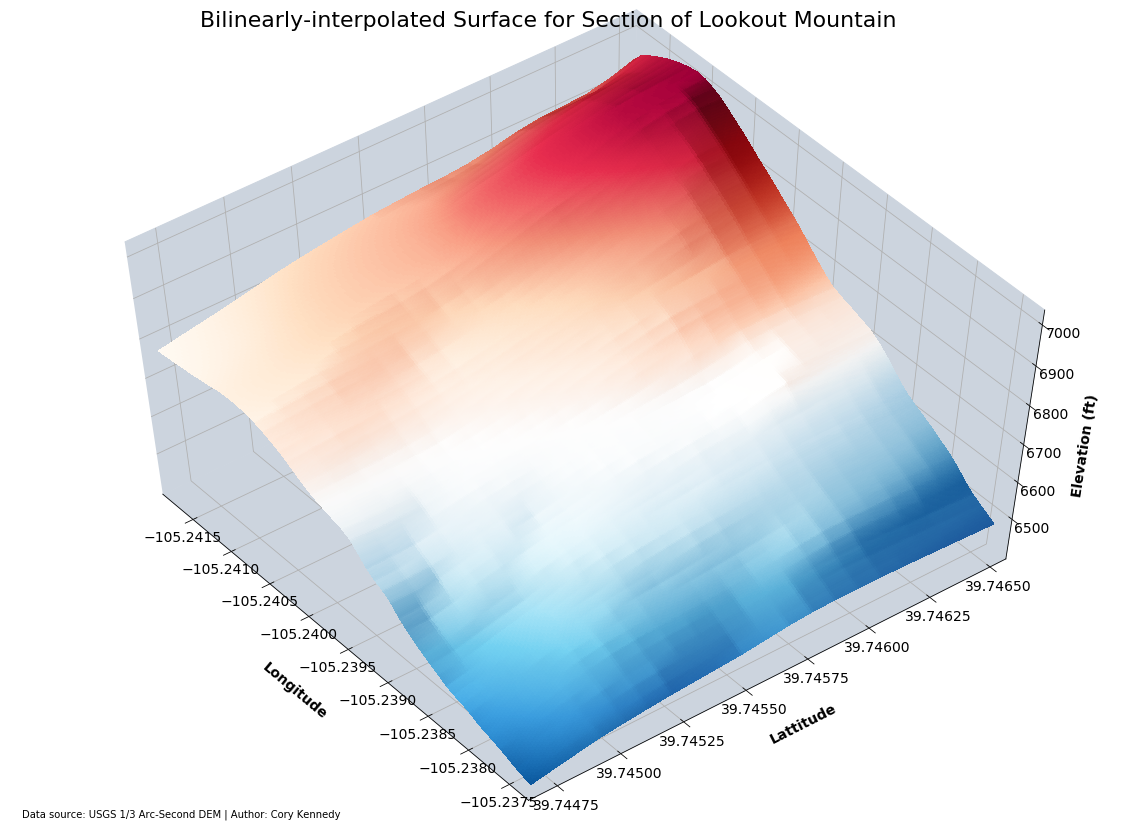

In [5]:
Z_bilin = bilin_data.elev.values

b = bilin_data.elev

fig_height = 15
fig_width = 1.33 * fig_height

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca(projection='3d')

# Set background color
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))

# Remove the plot frame lines. They are unnecessary.       
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# Set view angle
ax.elev = 57
ax.azim = 322

# Set boundaries of plot to be filled by data
plt.ylim(b.index.values[0], b.index.values[-1])
plt.xlim(b.columns.values.astype(float)[0], b.columns.values.astype(float)[-1])
ax.set_zlim(np.amin(Z_bilin), np.amax(Z_bilin))

# Format ticks
# Set tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
Z_labels = ['6500','6600','6700','6800','6900','7000']
ax.set_zticklabels(Z_labels, fontsize=14)
# Prevent displaying in exponential form
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set axis labels
ax.set_xlabel('Longitude', labelpad=30, fontsize=14, fontweight='bold')
ax.set_ylabel('Lattitude', labelpad=22, fontsize=14, fontweight='bold')
ax.set_zlabel('Elevation (ft)', labelpad=13, fontsize=14, fontweight='bold')

# Set plot title
title = "Bilinearly-interpolated Surface for Section of Lookout Mountain"
ax.text2D(0.17, 0.98, title, transform=ax.transAxes, fontsize=22)

# Add notes
ax.text2D(0.01, 0.01, "Data source: USGS 1/3 Arc-Second DEM | "
         "Author: Cory Kennedy", transform=ax.transAxes, fontsize=10)

# Plot surface needs 2D arrays as input
x = np.linspace(b.columns.values.astype(float)[0], b.columns.values.astype(float)[-1], Z_bilin.shape[1])
y = np.flip(np.linspace(b.index.values[0], b.index.values[-1], Z_bilin.shape[0]), axis=0)
X, Y = np.meshgrid(x, y)
Z = Z_bilin

# Shading to highlight the features
ls = LightSource(180, 45)
shaded_RdBu_r = ls.shade(Z, cmap=cm.RdBu_r, vert_exag=1.1, blend_mode='soft', fraction=1.1)

# Plot surface with points X,Y,Z
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=shaded_RdBu_r,
                       linewidth=0, antialiased=False, shade=False)

plt.savefig('../vis/bilin_interp_surf.png', bbox_inches='tight');

## Machine Learning Regression Model Trained with 10m Resolution Data

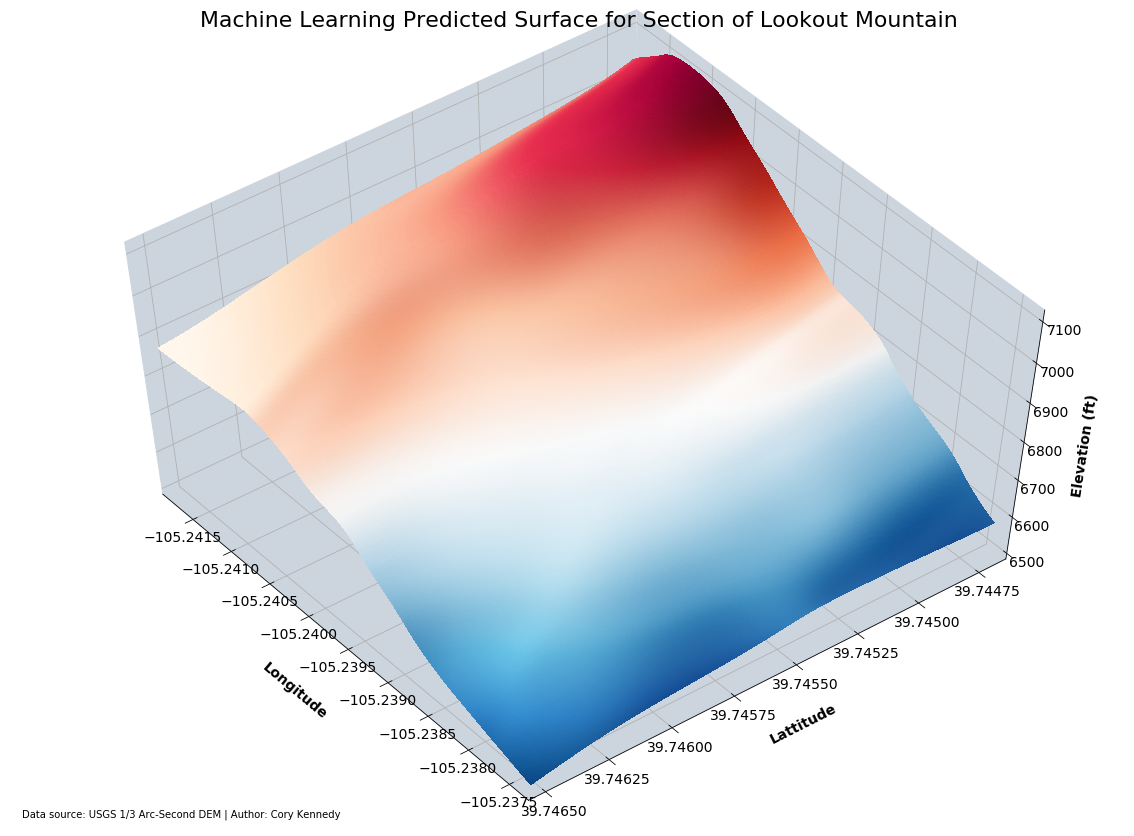

In [6]:
Z_ml = ml_data.elev.values

m = ml_data.elev

fig_height = 15
fig_width = 1.33 * fig_height

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca(projection='3d')

# Set background color
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))

# Remove the plot frame lines. They are unnecessary.       
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# Set view angle
ax.elev = 57
ax.azim = 322

# Set boundaries of plot to be filled by data
plt.ylim(m.index.values[0], m.index.values[-1])
plt.xlim(m.columns.values.astype(float)[0], m.columns.values.astype(float)[-1])
ax.set_zlim(np.amin(Z_ml), np.amax(Z_ml))

# Format ticks
# Set tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
Z_labels = ['6500','6600','6700','6800','6900','7000', '7100', '7200']
ax.set_zticklabels(Z_labels, fontsize=14)
# Prevent displaying in exponential form
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set axis labels
ax.set_xlabel('Longitude', labelpad=30, fontsize=14, fontweight='bold')
ax.set_ylabel('Lattitude', labelpad=22, fontsize=14, fontweight='bold')
ax.set_zlabel('Elevation (ft)', labelpad=13, fontsize=14, fontweight='bold')

# Set plot title
title = "Machine Learning Predicted Surface for Section of Lookout Mountain"
ax.text2D(0.17, 0.98, title, transform=ax.transAxes, fontsize=22)

# Add notes
ax.text2D(0.01, 0.01, "Data source: USGS 1/3 Arc-Second DEM | "
         "Author: Cory Kennedy", transform=ax.transAxes, fontsize=10)

# Plot surface needs 2D arrays as input
x = np.linspace(m.columns.values.astype(float)[0], m.columns.values.astype(float)[-1], Z_ml.shape[1])
y = np.flip(np.linspace(m.index.values[0], m.index.values[-1], Z_ml.shape[0]), axis=0)
X, Y = np.meshgrid(x, y)
Z = Z_ml

# Shading to highlight the features
ls = LightSource(210, 30)
shaded_RdBu_r = ls.shade(Z, cmap=cm.RdBu_r, vert_exag=1.1, blend_mode='soft', fraction=1.1)

# Plot surface with points X,Y,Z
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=shaded_RdBu_r,
                       linewidth=0, antialiased=False, shade=False)

plt.savefig('../vis/ml_predicted_surf.png', bbox_inches='tight');

In [40]:
ml_data.elev.head()

,-105.24180555559667,-105.24179646675323,-105.24178737790979,-105.24177828906633,-105.24176920022289,-105.24176011137945,-105.24175102253601,-105.24174193369255,-105.24173284484911,-105.24172375600567,...,-105.2374429107432,-105.23743382189976,-105.23742473305632,-105.23741564421286,-105.23740655536942,-105.23739746652598,-105.23738837768254,-105.23737928883908,-105.23737019999564,-105.2373611111522
39.746528,6938.477051,6940.275391,6942.067383,6943.849121,6945.615723,6947.363281,6949.086914,6950.784180,6952.452148,6954.085938,...,6490.845703,6489.757324,6488.687500,6487.635254,6486.599609,6485.579590,6484.573730,6483.581543,6482.600098,6481.628418
39.746519,6936.896484,6938.713379,6940.526367,6942.332031,6944.124512,6945.899902,6947.654297,6949.383789,6951.083984,6952.752930,...,6490.913086,6489.824707,6488.753906,6487.699219,6486.660156,6485.636230,6484.626953,6483.628418,6482.640625,6481.663574
39.746510,6935.350586,6937.182617,6939.013672,6940.839844,6942.655762,6944.457031,6946.239258,6947.999023,6949.730469,6951.432129,...,6490.997559,6489.908691,6488.835449,6487.779785,6486.737793,6485.710938,6484.695801,6483.692871,6482.699707,6481.714844
39.746501,6933.840820,6935.685547,6937.531250,6939.375977,6941.212891,6943.037109,6944.844727,6946.631348,6948.393555,6950.125488,...,6491.096191,6490.006836,6488.934570,6487.875977,6486.832031,6485.801758,6484.782227,6483.773926,6482.774414,6481.782227
39.746492,6932.367676,6934.222168,6936.081055,6937.940430,6939.795898,6941.641602,6943.472656,6945.284180,6947.073730,6948.834473,...,6491.210938,6490.122070,6489.048828,6487.988770,6486.941406,6485.907227,6484.885254,6483.871094,6482.866211,6481.868164


## Testing the Surface Modeling Methods Outlined Above

Manipulate the data in preparation for comparing it with ground-truth

Calculate the difference from ground-truth, using a nearest-neighbor approach, for each discrete location in the surface models we've created.

In [9]:
# Calculate and store differences from ground-truth data at all discrete points in tiled/bilin DataFrames
tile_diff = model_utils.get_df_difference_as_df(ground_truth_data.elev, tile_data.elev)
bilin_diff = model_utils.get_df_difference_as_df(ground_truth_data.elev, bilin_data.elev)
ml_diff = model_utils.get_df_difference_as_df(ground_truth_data.elev, ml_data.elev)

In [10]:
# Save difference DataFrames so above cell doesn't need to be run constantly
tile_diff.to_csv('../data/tile_difference.csv')
bilin_diff.to_csv('../data/bilin_difference.csv')
ml_diff.to_csv('../data/ml_difference.csv')

In [11]:
tile_diff = pd.read_csv('../data/tile_difference.csv')
bilin_diff = pd.read_csv('../data/bilin_difference.csv')
ml_diff = pd.read_csv('../data/ml_difference.csv')

Store some values for our analysis

In [12]:
tile_diff_array = tile_diff.values
tile_abs_diff_array = np.abs(tile_diff_array)
tile_avg_diff = np.mean(tile_abs_diff_array)
flat_tile_diff = tile_diff_array.flatten()

bilin_diff_array = bilin_diff.values
bilin_abs_diff_array = np.abs(bilin_diff_array)
bilin_avg_diff = np.mean(bilin_abs_diff_array)
flat_bilin_diff = bilin_diff_array.flatten()

ml_diff_array = ml_diff.values
ml_abs_diff_array = np.abs(ml_diff_array)
ml_avg_diff = np.mean(ml_abs_diff_array)
flat_ml_diff = ml_diff_array.flatten()

Now let's look at some results

## Difference Histogram of the Three Models, Compared to Ground-truth

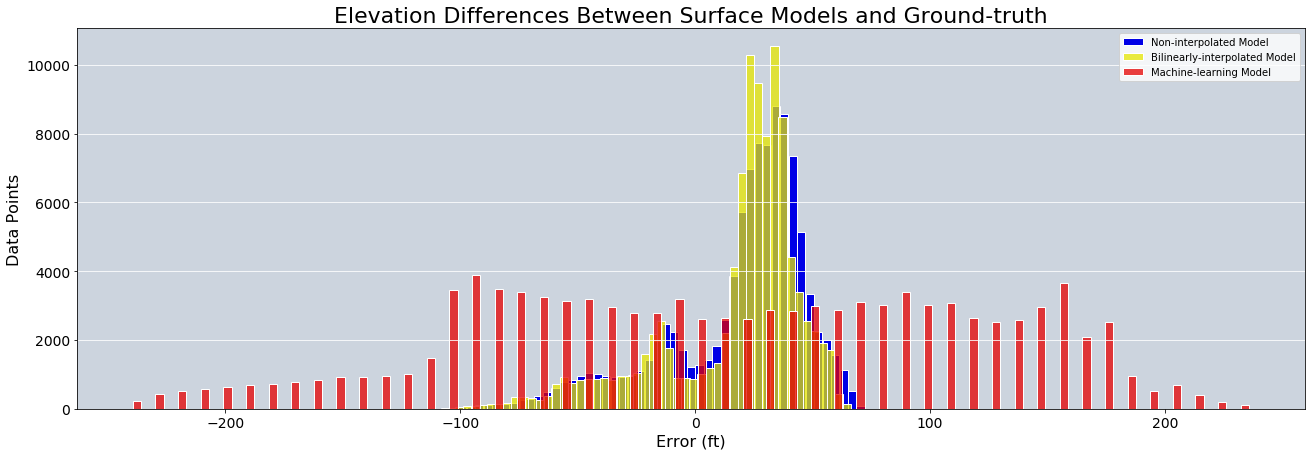

In [26]:
bar_tile, bins_tile = np.histogram(flat_tile_diff, bins=50)
bar_bilin, bins_bilin = np.histogram(flat_bilin_diff, bins=50)
bar_ml, bins_ml = np.histogram(flat_ml_diff, bins=50)
plt.figure(figsize=(22,7))

# set background and gridline color
plt.gca().patch.set_facecolor((0.8, 0.83, 0.87, 1.0))
plt.grid(True, color='w', axis='y')

# width of 3.5 gives the bars visually appealling spacing
plt.bar(bins_tile[:-1], bar_tile, width=3.5, linewidth=1, edgecolor='w', facecolor=(0.0, 0.0, 0.9, 1.0))
plt.bar(bins_bilin[:-1], bar_bilin, width=3.5, linewidth=1, edgecolor='w', facecolor=(0.9, 0.9, 0.0, 0.75))
plt.bar(bins_ml[:-1], bar_ml, width=3.5, linewidth=1, edgecolor='w', facecolor=(0.9, 0.0, 0.0, 0.75))

# add labels of easily readable sizes
plt.title('Elevation Differences Between Surface Models and Ground-truth', fontsize=22)
plt.xlabel('Error (ft)', fontsize=16)
plt.ylabel('Data Points', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(('Non-interpolated Model', 'Bilinearly-interpolated Model', 'Machine-learning Model'))
plt.savefig('../vis/interp_diff_compare_hist.png', bbox_inches='tight')
plt.show()

## Color-mapped Distribution of Error on the Non-interpolated Surface Model

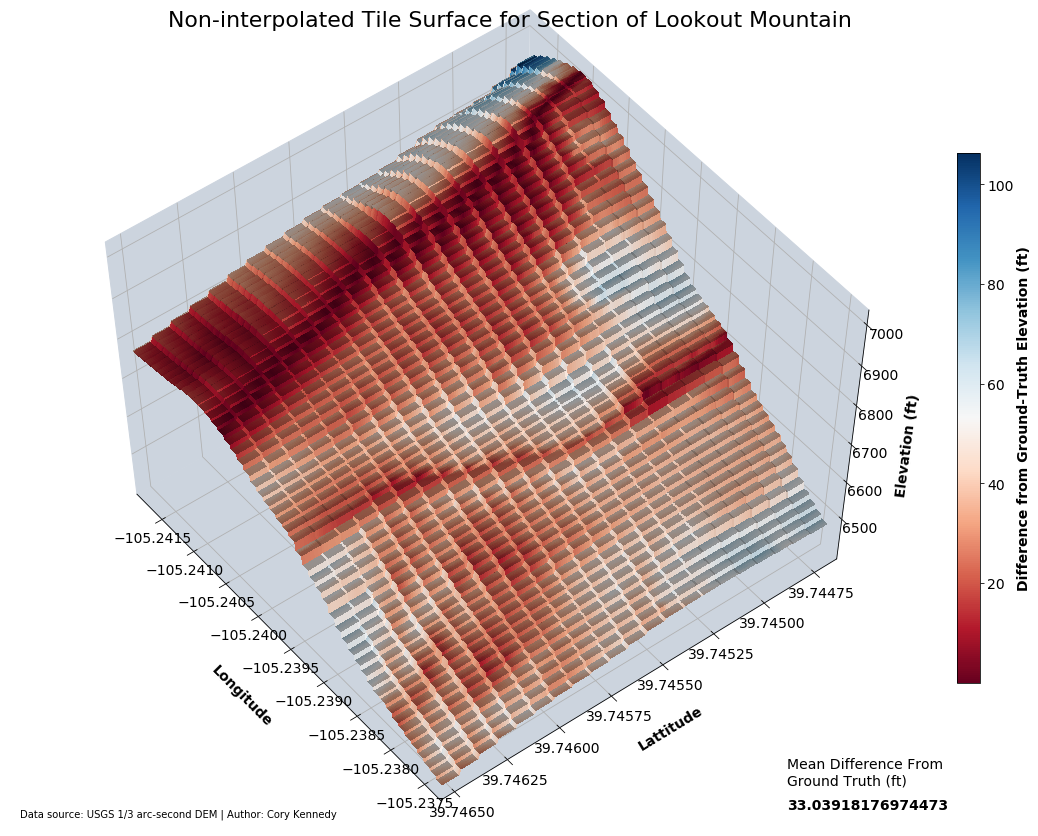

In [15]:
Z_tile = tile_data.elev.values

t = tile_data.elev

fig_height = 15
fig_width = 1.33 * fig_height

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca(projection='3d')

# Set background color
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))

# Remove the plot frame lines. They are unnecessary.       
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# Set view angle
ax.elev = 57
ax.azim = 322

# Set boundaries of plot to be filled by data
plt.ylim(t.index.values[0], t.index.values[-1])
plt.xlim(t.columns.values.astype(float)[0], t.columns.values.astype(float)[-1])
ax.set_zlim(np.amin(Z_tile), np.amax(Z_tile))

# Format ticks
# Set tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
Z_labels = ['6500','6600','6700','6800','6900','7000']
ax.set_zticklabels(Z_labels, fontsize=14)
# Prevent displaying in exponential form
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set axis labels
ax.set_xlabel('Longitude', labelpad=30, fontsize=14, fontweight='bold')
ax.set_ylabel('Lattitude', labelpad=22, fontsize=14, fontweight='bold')
ax.set_zlabel('Elevation (ft)', labelpad=13, fontsize=14, fontweight='bold')

# Set plot title
title = "Non-interpolated Tile Surface for Section of Lookout Mountain"
ax.text2D(0.17, 0.98, title, transform=ax.transAxes, fontsize=22)

# Add notes
ax.text2D(0.01, 0.01, "Data source: USGS 1/3 arc-second DEM | "
         "Author: Cory Kennedy", transform=ax.transAxes, fontsize=10)
ax.text2D(0.84, 0.05, "Mean Difference From\nGround Truth (ft)", transform=ax.transAxes, fontsize=14)
ax.text2D(0.84, 0.02, str(tile_avg_diff), transform=ax.transAxes, fontsize=14, fontweight='bold')

# as plot_surface needs 2D arrays as input
x = np.linspace(t.columns.values.astype(float)[0], t.columns.values.astype(float)[-1], Z_tile.shape[1])
y = np.linspace(t.index.values[0], t.index.values[-1], Z_tile.shape[0])
# we make a meshgrid from the x,y data
X, Y = np.meshgrid(x, y)
Z = Z_tile

# diff_value shall be represented by color
diff_value = tile_abs_diff_array

# map the data to rgba values from a colormap
colors = cm.ScalarMappable(cmap="RdBu")
elevDiff = colors.to_rgba(diff_value.astype(float))

# map colormap to diff values for colorbar
colors.set_array(diff_value.astype(float))

# plot_surface with points X,Y,Z and diff_value as colors
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=elevDiff,
                       linewidth=0, antialiased=False, shade=True)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(colors, shrink=0.65, aspect=23, pad=0.02)
cbar.set_label('Difference from Ground-Truth Elevation (ft)', fontsize=14, fontweight='bold')
cbar.ax.set_yticklabels(['20','40','60','80','100'], fontsize=14)

plt.savefig('../vis/no_interp_surf_with_diff_heat.png', bbox_inches='tight');

The non-interpolated model seems to perform better on ridges than in troughs. Also, it has notable trouble in the northeast (top-right) corner of the region. The Absolute Mean Difference from ground-truth is 33.03 ft.

## Color-mapped Distribution of Error on the Bilinearly-interpolated Surface Model

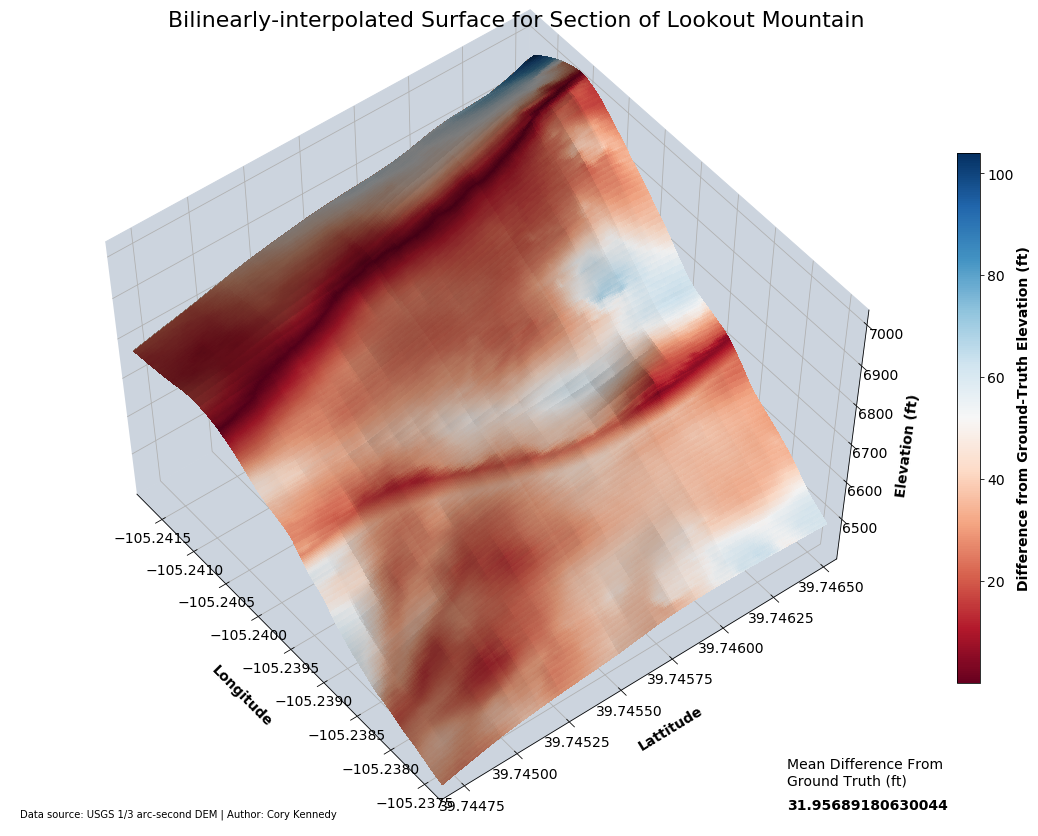

In [16]:
Z_bilin = bilin_data.elev.values

b = bilin_data.elev

fig_height = 15
fig_width = 1.33 * fig_height

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca(projection='3d')

# set background color
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))

# Remove the plot frame lines. They are unnecessary.       
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# Set view angle
ax.elev = 57
ax.azim = 322

# Set boundaries of plot to be filled by data
plt.ylim(b.index.values[0], b.index.values[-1])
plt.xlim(b.columns.values.astype(float)[0], b.columns.values.astype(float)[-1])
ax.set_zlim(np.amin(Z_bilin), np.amax(Z_bilin))

# format ticks
# set tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
Z_labels = ['6500','6600','6700','6800','6900','7000']
ax.set_zticklabels(Z_labels, fontsize=14)
# prevent displaying in exponential form
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set axis labels
ax.set_xlabel('Longitude', labelpad=30, fontsize=14, fontweight='bold')
ax.set_ylabel('Lattitude', labelpad=22, fontsize=14, fontweight='bold')
ax.set_zlabel('Elevation (ft)', labelpad=13, fontsize=14, fontweight='bold')

# Set plot title
title = "Bilinearly-interpolated Surface for Section of Lookout Mountain"
ax.text2D(0.17, 0.98, title, transform=ax.transAxes, fontsize=22)

# Add notes
ax.text2D(0.01, 0.01, "Data source: USGS 1/3 arc-second DEM | "
         "Author: Cory Kennedy", transform=ax.transAxes, fontsize=10)
ax.text2D(0.84, 0.05, "Mean Difference From\nGround Truth (ft)", transform=ax.transAxes, fontsize=14)
ax.text2D(0.84, 0.02, str(bilin_avg_diff), transform=ax.transAxes, fontsize=14, fontweight='bold')

# as plot_surface needs 2D arrays as input
x = np.linspace(b.columns.values.astype(float)[0], b.columns.values.astype(float)[-1], Z_bilin.shape[1])
y = np.flip(np.linspace(b.index.values[0], b.index.values[-1], Z_bilin.shape[0]), axis=0)
# we make a meshgrid from the x,y data
X, Y = np.meshgrid(x, y)
Z = Z_bilin

# diff_value shall be represented by color
diff_value = bilin_abs_diff_array

# map the data to rgba values from a colormap
colors = cm.ScalarMappable(cmap="RdBu")
elevDiff = colors.to_rgba(diff_value.astype(float))

# map colormap to diff values for colorbar
colors.set_array(diff_value.astype(float))

# plot_surface with points X,Y,Z and diff_value as colors
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=elevDiff,
                       linewidth=0, antialiased=False, shade=True)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(colors, shrink=0.65, aspect=23, pad=0.02)
cbar.set_label('Difference from Ground-Truth Elevation (ft)', fontsize=14, fontweight='bold')
cbar.ax.set_yticklabels(['20','40','60','80','100'], fontsize=14)

plt.savefig('../vis/bilin_interp_surf_with_diff_heat.png', bbox_inches='tight');

## Color-mapped Distribution of Error on the Machine Learning Predicted Surface Model

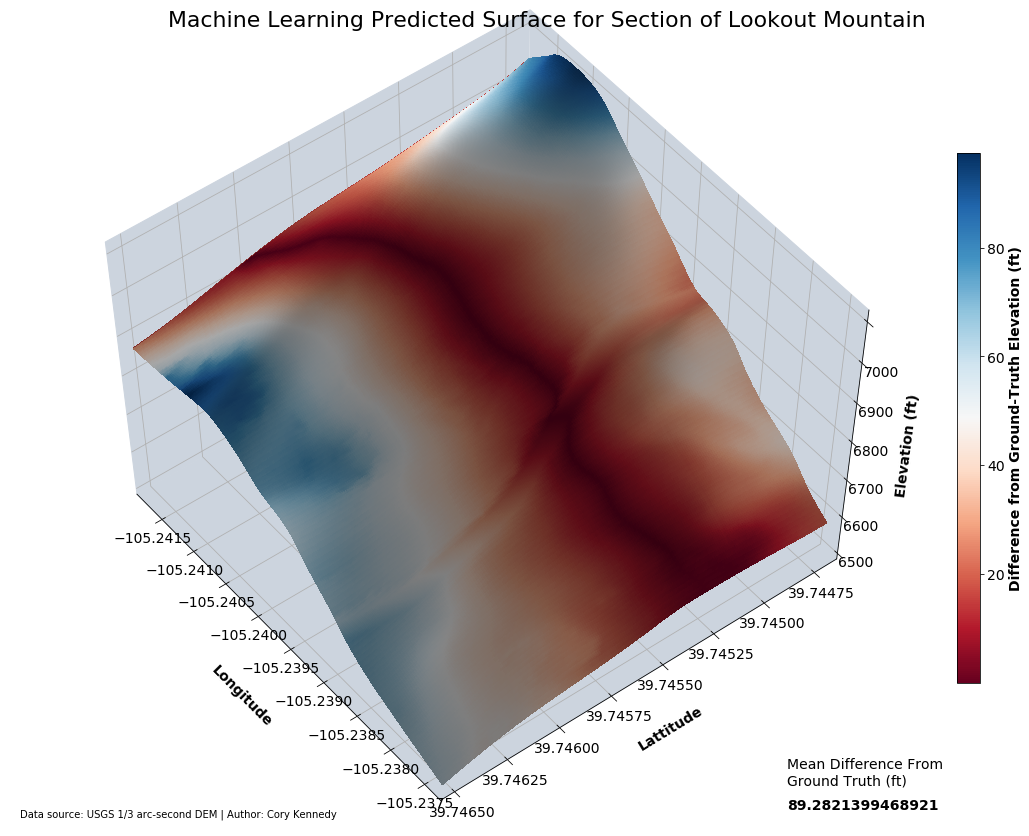

In [37]:
Z_ml = ml_data.elev.values

m = ml_data.elev

fig_height = 15
fig_width = 1.33 * fig_height

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca(projection='3d')

# set background color
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))

# Remove the plot frame lines. They are unnecessary.       
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# Set view angle
ax.elev = 57
ax.azim = 322

# Set boundaries of plot to be filled by data
plt.ylim(m.index.values[0], m.index.values[-1])
plt.xlim(m.columns.values.astype(float)[0], m.columns.values.astype(float)[-1])
ax.set_zlim(np.amin(Z_ml), np.amax(Z_ml))

# format ticks
# set tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
Z_labels = ['6500','6600','6700','6800','6900','7000']
ax.set_zticklabels(Z_labels, fontsize=14)
# prevent displaying in exponential form
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set axis labels
ax.set_xlabel('Longitude', labelpad=30, fontsize=14, fontweight='bold')
ax.set_ylabel('Lattitude', labelpad=22, fontsize=14, fontweight='bold')
ax.set_zlabel('Elevation (ft)', labelpad=13, fontsize=14, fontweight='bold')

# Set plot title
title = "Machine Learning Predicted Surface for Section of Lookout Mountain"
ax.text2D(0.17, 0.98, title, transform=ax.transAxes, fontsize=22)

# Add notes
ax.text2D(0.01, 0.01, "Data source: USGS 1/3 arc-second DEM | "
         "Author: Cory Kennedy", transform=ax.transAxes, fontsize=10)
ax.text2D(0.84, 0.05, "Mean Difference From\nGround Truth (ft)", transform=ax.transAxes, fontsize=14)
ax.text2D(0.84, 0.02, str(ml_avg_diff), transform=ax.transAxes, fontsize=14, fontweight='bold')

# as plot_surface needs 2D arrays as input
x = np.linspace(m.columns.values.astype(float)[0], m.columns.values.astype(float)[-1], Z_ml.shape[1])
y = np.flip( np.linspace(m.index.values[0], m.index.values[-1], Z_ml.shape[0]) , axis=0)
# we make a meshgrid from the x,y data
X, Y = np.meshgrid(x, y)
Z = Z_ml

# diff_value shall be represented by color
diff_value = ml_abs_diff_array

# map the data to rgba values from a colormap
colors = cm.ScalarMappable(cmap="RdBu")
elevDiff = colors.to_rgba(diff_value.astype(float))

# map colormap to diff values for colorbar
colors.set_array(diff_value.astype(float))

# plot_surface with points X,Y,Z and diff_value as colors
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=elevDiff,
                       linewidth=0, antialiased=False, shade=True)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(colors, shrink=0.65, aspect=23, pad=0.02)
cbar.set_label('Difference from Ground-Truth Elevation (ft)', fontsize=14, fontweight='bold')
cbar.ax.set_yticklabels(['20','40','60','80','100', '120', '140', '160'], fontsize=14)

plt.savefig('../vis/ml_predicted_surf_with_diff_heat.png', bbox_inches='tight');

In [41]:
ml_diff.head()

,Unnamed: 0,-105.24180555559667,-105.24179646675323,-105.24178737790979,-105.24177828906633,-105.24176920022289,-105.24176011137945,-105.24175102253601,-105.24174193369255,-105.24173284484911,...,-105.2374429107432,-105.23743382189976,-105.23742473305632,-105.23741564421286,-105.23740655536942,-105.23739746652598,-105.23738837768254,-105.23737928883908,-105.23737019999564,-105.2373611111522
0,39.746528,-184.122559,-185.447266,-187.239258,-188.400879,-189.487793,-190.531738,-192.255371,-193.242188,-194.216797,...,-50.494141,-49.405762,-50.016113,-50.485840,-50.696777,-49.676758,-50.048340,-50.698242,-51.268555,-51.847168
1,39.746519,-181.873535,-183.220703,-185.033691,-186.289062,-187.346191,-188.455566,-190.209961,-191.211426,-192.088379,...,-49.329590,-48.241211,-48.598633,-49.116211,-49.763672,-48.739746,-48.977051,-49.565918,-50.235352,-50.748535
2,39.746510,-179.622070,-180.885742,-182.716797,-183.889160,-185.040039,-186.293457,-188.075684,-189.098145,-189.960938,...,-48.206055,-47.117188,-47.437500,-48.003418,-48.788086,-47.761230,-48.152832,-48.608887,-49.224609,-49.792969
3,39.746501,-177.325195,-178.493652,-180.339355,-181.477051,-182.676270,-184.002441,-185.810059,-186.843750,-187.869629,...,-47.262695,-46.173340,-46.663574,-47.217285,-47.853516,-46.823242,-47.305176,-47.759766,-48.264160,-48.749512
4,39.746492,-175.023926,-176.172363,-178.031250,-179.162109,-180.286621,-181.470215,-183.301270,-184.483887,-185.675293,...,-46.491699,-45.402832,-45.875000,-46.364746,-46.846680,-45.812500,-46.178711,-46.887207,-47.510742,-47.945801


In [ ]:
# Sandbox for investigating reason for apparent intersection in above colormap
from importlib import reload
reload(ml_model)

ml_data_test = ml_model.MLModel(NW_corner, SE_corner, data='10m')
ml_diff_test = model_utils.get_df_difference_as_df(ground_truth_data.elev, ml_data_test.elev)
ml_abs_diff_test_array = np.abs(ml_diff_test.values)

building grid reference string...
generating file path to raster data...
retrieving raster data...
Geotransforming Elevation Data...
Unpacking Grid...
defining raster data parameters...
generating lat/lon domain arrays...
storing raster data...
generating elevation DataFrame...
Keras model file name: elevation_model_real_data2018-06-27_19:12:29.h5
Training data file name: theM_10m_3.npy
Validation data file name: theM_1m_3.npy


In [ ]:
Z_ml_test = ml_data_test.elev.values

m = ml_data_test.elev

fig_height = 15
fig_width = 1.33 * fig_height

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.gca(projection='3d')

# set background color
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.83, 0.87, 1.0))

# Remove the plot frame lines. They are unnecessary.       
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# Set view angle
ax.elev = 57
ax.azim = 322

# Set boundaries of plot to be filled by data
plt.ylim(m.index.values[0], m.index.values[-1])
plt.xlim(m.columns.values.astype(float)[0], m.columns.values.astype(float)[-1])
ax.set_zlim(np.amin(Z_ml_test), np.amax(Z_ml_test))

# format ticks
# set tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
Z_labels = ['6500','6600','6700','6800','6900','7000']
ax.set_zticklabels(Z_labels, fontsize=14)
# prevent displaying in exponential form
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set axis labels
ax.set_xlabel('Longitude', labelpad=30, fontsize=14, fontweight='bold')
ax.set_ylabel('Lattitude', labelpad=22, fontsize=14, fontweight='bold')
ax.set_zlabel('Elevation (ft)', labelpad=13, fontsize=14, fontweight='bold')

# Set plot title
title = "Machine Learning Predicted Surface for Section of Lookout Mountain"
ax.text2D(0.17, 0.98, title, transform=ax.transAxes, fontsize=22)

# Add notes
ax.text2D(0.01, 0.01, "Data source: USGS 1/3 arc-second DEM | "
         "Author: Cory Kennedy", transform=ax.transAxes, fontsize=10)
ax.text2D(0.84, 0.05, "Mean Difference From\nGround Truth (ft)", transform=ax.transAxes, fontsize=14)
ax.text2D(0.84, 0.02, str(np.mean(ml_abs_diff_array)), transform=ax.transAxes, fontsize=14, fontweight='bold')

# as plot_surface needs 2D arrays as input
x = np.linspace(m.columns.values.astype(float)[0], m.columns.values.astype(float)[-1], Z_ml_test.shape[1])
y = np.flip( np.linspace(m.index.values[0], m.index.values[-1], Z_ml_test.shape[0]) , axis=0)
# we make a meshgrid from the x,y data
X, Y = np.meshgrid(x, y)
Z = Z_ml_test

# diff_value shall be represented by color
diff_value = ml_abs_diff_test_array

# map the data to rgba values from a colormap
colors = cm.ScalarMappable(cmap="RdBu")
elevDiff = colors.to_rgba(diff_value.astype(float))

# map colormap to diff values for colorbar
colors.set_array(diff_value.astype(float))

# plot_surface with points X,Y,Z and diff_value as colors
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=elevDiff,
                       linewidth=0, antialiased=False, shade=True)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(colors, shrink=0.65, aspect=23, pad=0.02)
cbar.set_label('Difference from Ground-Truth Elevation (ft)', fontsize=14, fontweight='bold')
cbar.ax.set_yticklabels(['20','40','60','80','100', '120', '140', '160'], fontsize=14)
